In [13]:
from fastai.vision import *

In [14]:
path = Path('/home/omm/WorkStuff/CarClassifier')

In [15]:
path.ls()

[PosixPath('/home/omm/WorkStuff/CarClassifier/.ipynb_checkpoints'),
 PosixPath('/home/omm/WorkStuff/CarClassifier/export.pkl'),
 PosixPath('/home/omm/WorkStuff/CarClassifier/carclassifier.ipynb'),
 PosixPath('/home/omm/WorkStuff/CarClassifier/README.md'),
 PosixPath('/home/omm/WorkStuff/CarClassifier/.git'),
 PosixPath('/home/omm/WorkStuff/CarClassifier/koenigsegg-agera-rs_100502570_h.jpg')]

In [16]:
classes = ['Aventador', 'G63', 'Agera']

In [4]:
dest = path/classes[2]

In [5]:
imgurl = Path('/home/jupyter/workStuff/source/carclassifier')

In [32]:
# file = 'download (9)'

In [33]:
# download_images(imgurl/file, dest, max_pics = 500)

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete = True, max_size = 500)

In [17]:
np.random.seed(40)

In [11]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct = 0.2, ds_tfms=get_transforms(), size =224, num_workers=4).normalize(imagenet_stats)

/home/omm/.local/lib/python3.7/site-packages/fastai/data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


You can deactivate this warning by passing `no_check=True`.


/home/omm/.local/lib/python3.7/site-packages/fastai/basic_data.py:245: UserWarning: Your training dataloader is empty, you have only 1 items in your training set.
                 Your batch size is 64, you should lower it.
  Your batch size is {self.train_dl.batch_size}, you should lower it.""")


In [8]:
data.classes

['Agera', 'Aventador', 'G63', 'cars']

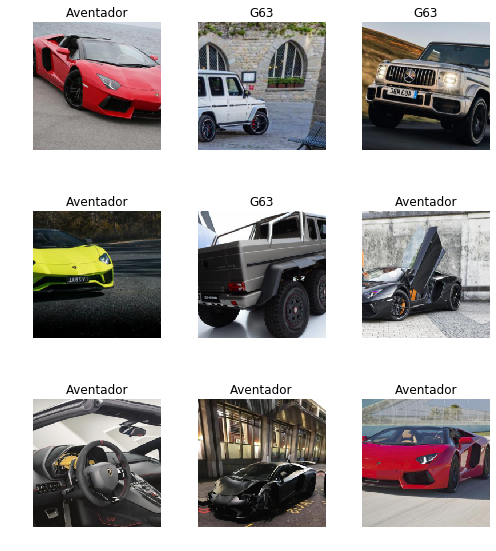

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Agera', 'Aventador', 'G63'], 3, 1384, 345)

In [11]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


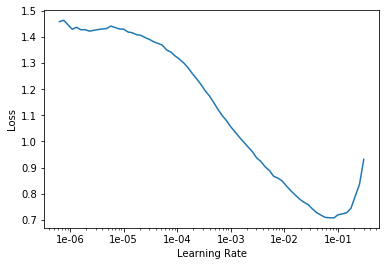

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2))

In [16]:
learn.save('stage_1')

In [10]:
learn.load('stage_1')

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param with shape torch.Size([3, 512]) from checkpoint, the shape in current model is torch.Size([4, 512]).
	size mismatch for 1.8.bias: copying a param with shape torch.Size([3]) from checkpoint, the shape in current model is torch.Size([4]).

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

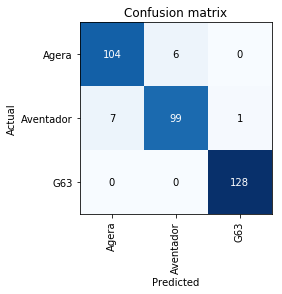

In [19]:
interp.plot_confusion_matrix()

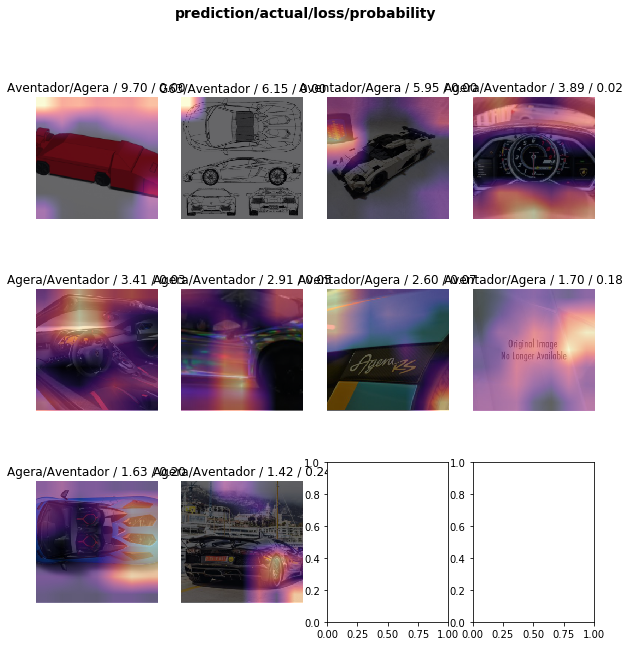

In [20]:
interp.plot_top_losses(10, figsize=(10,10))

In [22]:
interp.most_confused(min_val=2)

[('Aventador', 'Agera', 7), ('Agera', 'Aventador', 6)]

In [26]:
learn.export()

In [3]:
defaults.device = torch.device('cpu')

In [13]:
path

PosixPath('/home/jupyter/workStuff/data/cars')

In [5]:
path.ls()

[PosixPath('/home/jupyter/workStuff/data/cars/agerarsnevadahsr-13.jpg'),
 PosixPath('/home/jupyter/workStuff/data/cars/Agera'),
 PosixPath('/home/jupyter/workStuff/data/cars/export.pkl'),
 PosixPath('/home/jupyter/workStuff/data/cars/koenigsegg-agera-rs_100502570_h.jpg'),
 PosixPath('/home/jupyter/workStuff/data/cars/proxy.duckduckgo.com.jpeg'),
 PosixPath('/home/jupyter/workStuff/data/cars/G63'),
 PosixPath('/home/jupyter/workStuff/data/cars/Aventador'),
 PosixPath('/home/jupyter/workStuff/data/cars/models')]

In [12]:
the_model = TheModelClass(*args, **kwargs)

NameError: name 'TheModelClass' is not defined

In [20]:
learn = load_learner(path)

/home/omm/.local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/omm/.local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/omm/.local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's

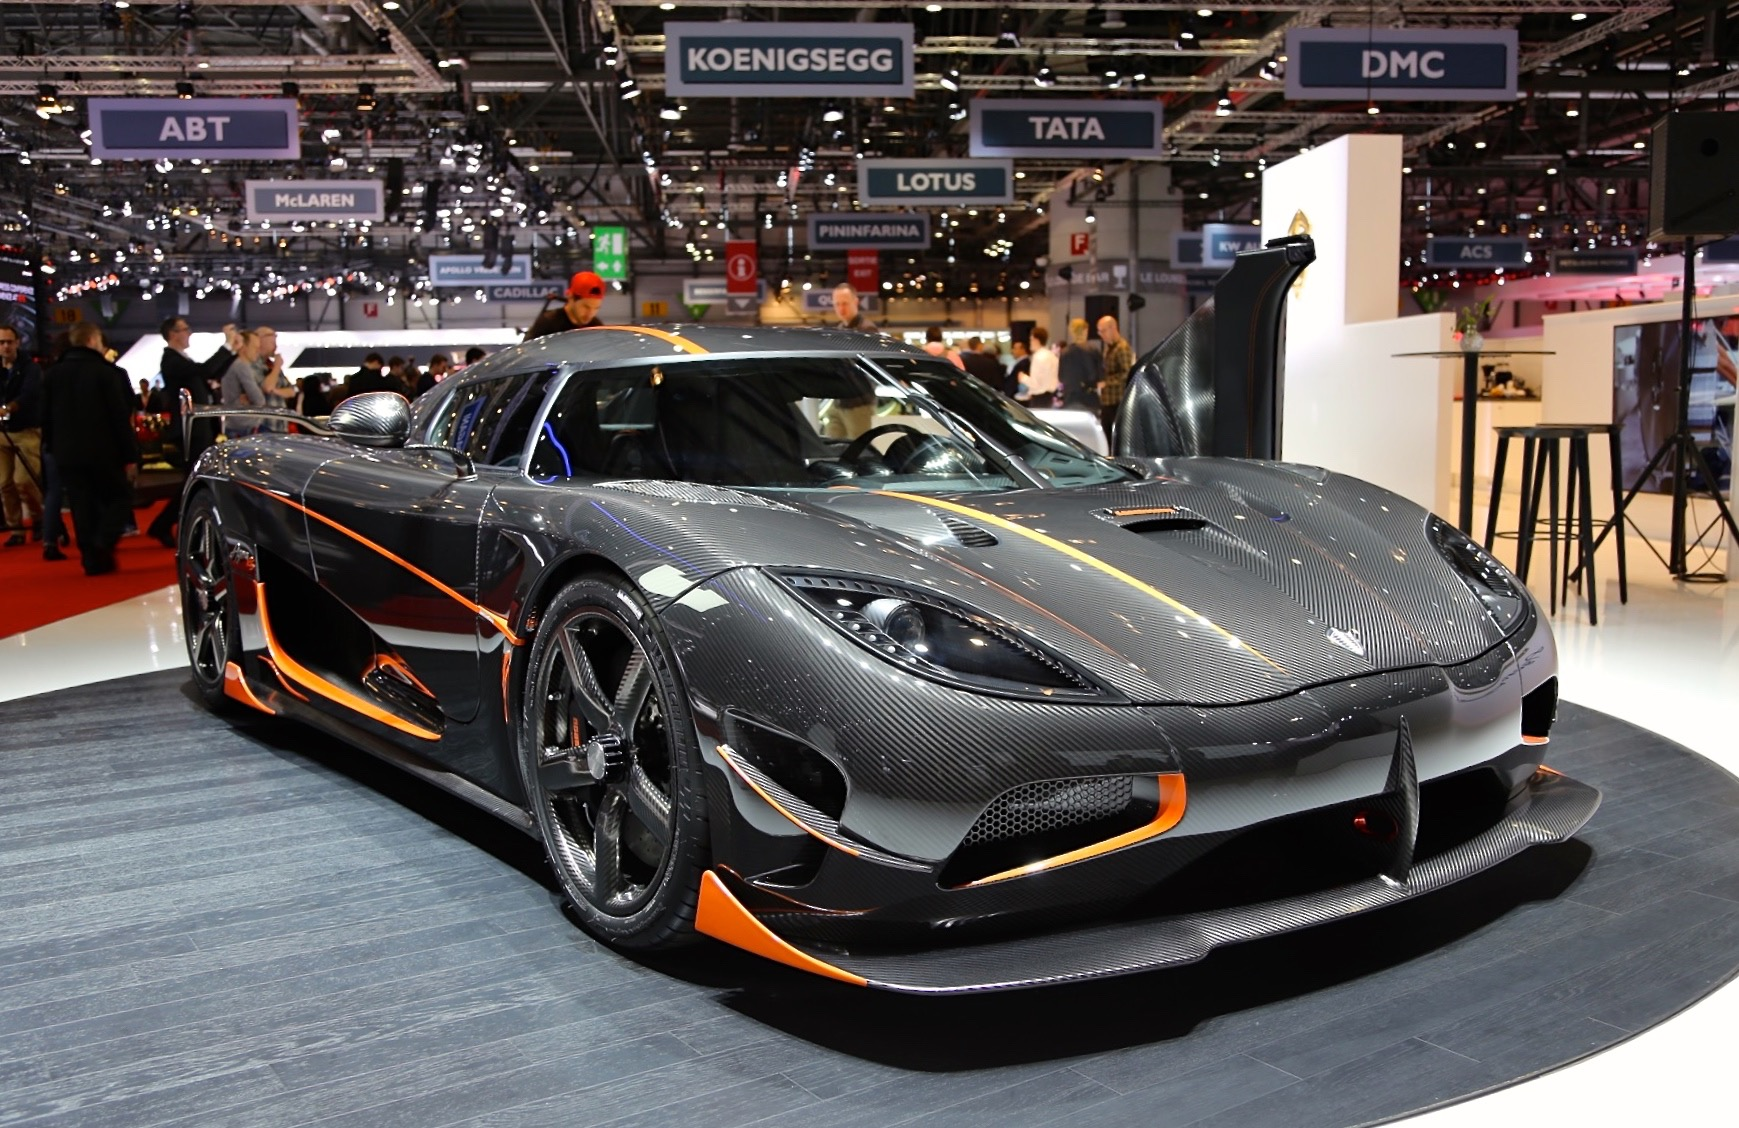

In [21]:
img = open_image(path/'koenigsegg-agera-rs_100502570_h.jpg')
img

In [22]:
pred_class, pred_ix, outputs= learn.predict(img)
pred_class

AttributeError: 'ReLU' object has no attribute 'threshold'